In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from numpy import inf
import datetime
%matplotlib inline

In [3]:
companies_list = ['AAPL','NKE','GOOGL', 'AMZN']
test_data = data.DataReader(companies_list, 'yahoo', start='2018/01/01', end='2019/12/31')
test_data = test_data['Adj Close']

In [4]:
test_data.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2018-01-02,41.310070,61.287899,1073.209961,1189.010010
2018-01-03,41.302879,61.278240,1091.520020,1204.199951
2018-01-04,41.494736,61.239632,1095.760010,1209.589966
2018-01-05,41.967163,61.760906,1110.290039,1229.140015
2018-01-08,41.811283,62.311138,1114.209961,1246.869995


# Percentage change calculation

In [5]:
test_pct = test_data.pct_change().apply(lambda x: np.log(1+x))

In [6]:
test_pct.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,-0.000158,0.016917,0.012694
2018-01-04,0.004634,-0.000630,0.003877,0.004466
2018-01-05,0.011321,0.008476,0.013173,0.016033
2018-01-08,-0.003721,0.008870,0.003524,0.014322


In [7]:
np_data = test_data.to_numpy().T

In [8]:
[cols, rows] = np_data.shape

In [9]:
cp_array_1 = np_data[:, 1:]
cp_array_zeros = np.zeros((np_data.shape[0],1), dtype='float64')
cp_array_concat = np.concatenate((cp_array_1,cp_array_zeros), axis=1)
np_pct = np.log(cp_array_concat/np_data)
np_pct[np_pct == -inf] = 0

/home/mauro/miniforge3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [10]:
#np_pct.T is the same as test_pct
np_pct = np.nan_to_num(np_pct)
np_pct.T

array([[-0.00017408, -0.00015761,  0.01691712,  0.01269437],
       [ 0.00463435, -0.00063025,  0.00387696,  0.00446603],
       [ 0.01132091,  0.00847602,  0.01317308,  0.01603332],
       ...,
       [ 0.00591754, -0.00760986, -0.0110826 , -0.01232835],
       [ 0.00727999,  0.00504675, -0.00023885,  0.00051422],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

# Variance calculation

In [11]:
test_var = test_pct.var()
test_var

Symbols
AAPL     0.000303
NKE      0.000253
GOOGL    0.000269
AMZN     0.000363
dtype: float64

In [12]:
np_var = np.var(np_pct, axis=1)
np_var = np.nan_to_num(np_var)

In [13]:
np_var

array([0.00030158, 0.00025248, 0.00026833, 0.00036127])

# Volatility calculation

In [14]:
np_vol = np.sqrt(np_var * 250)


In [15]:
np_vol

array([0.27457935, 0.25123732, 0.25900136, 0.30052797])

# Covariance calculation

In [16]:
test_cov = test_pct.cov()

In [17]:
test_cov

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000303,0.000122,0.000178,0.000206
NKE,0.000122,0.000253,0.000119,0.000139
GOOGL,0.000178,0.000119,0.000269,0.000216
AMZN,0.000206,0.000139,0.000216,0.000363


In [18]:
np_cov = np.cov(np_pct)

In [19]:
np_cov

array([[0.00030218, 0.00012156, 0.00017719, 0.00020515],
       [0.00012156, 0.00025298, 0.00011832, 0.00013881],
       [0.00017719, 0.00011832, 0.00026886, 0.000216  ],
       [0.00020515, 0.00013881, 0.000216  , 0.00036199]])

# Correlation calculation

In [20]:
test_corr = test_pct.corr()

In [21]:
test_corr

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.439667,0.621640,0.620295
NKE,0.439667,1.000000,0.453669,0.458711
GOOGL,0.621640,0.453669,1.000000,0.692366
AMZN,0.620295,0.458711,0.692366,1.000000


In [22]:
np_corr = np.corrcoef(np_pct)

In [23]:
np_corr

array([[1.        , 0.4396713 , 0.62164014, 0.62029676],
       [0.4396713 , 1.        , 0.45367011, 0.45871368],
       [0.62164014, 0.45367011, 1.        , 0.69236681],
       [0.62029676, 0.45871368, 0.69236681, 1.        ]])

# Expected returns calculation

In [24]:
test_er = test_data.resample('Y').last().pct_change().apply(lambda x: np.log(1+x)).mean()

In [25]:
test_er

Symbols
AAPL     0.636354
NKE      0.322765
GOOGL    0.248236
AMZN     0.207240
dtype: float64

In [26]:
np_er = np.mean(np_pct.T[-250:],axis=0)*250

In [27]:
np_er

array([0.69833436, 0.31590957, 0.21704194, 0.1595145 ])

# Annual volatility calculation

In [28]:
test_volatility = test_data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

In [29]:
test_volatility

Symbols
AAPL     0.275126
NKE      0.251737
GOOGL    0.259518
AMZN     0.301127
dtype: float64

In [30]:
np_volatility = np.zeros(np_pct.shape[0], dtype=float)
for x in range(np_pct.shape[0]):
    np_volatility[x] = np_pct[x].std() * np.sqrt(250)

In [31]:
np_volatility 

array([0.27457935, 0.25123732, 0.25900136, 0.30052797])

# Show risk and returns

In [32]:
df_assets = pd.concat([test_er, test_volatility], axis=1)
df_assets.columns=['Returns','Volatility']
df_assets

,Returns,Volatility
Symbols,,
AAPL,0.636354,0.275126
NKE,0.322765,0.251737
GOOGL,0.248236,0.259518
AMZN,0.207240,0.301127


# Efficient Frontier

In [33]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(test_data.columns)
num_portfolios = 10000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, test_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = test_cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)


data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(test_data.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.376221,0.216949,0.284723,0.331392,0.207803,0.176082
1,0.351161,0.223836,0.249306,0.243085,0.216062,0.291547
2,0.405779,0.224978,0.386248,0.235364,0.136711,0.241677
3,0.289179,0.222254,0.073779,0.263190,0.484780,0.178251
4,0.383029,0.235502,0.363348,0.089906,0.231361,0.315385


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

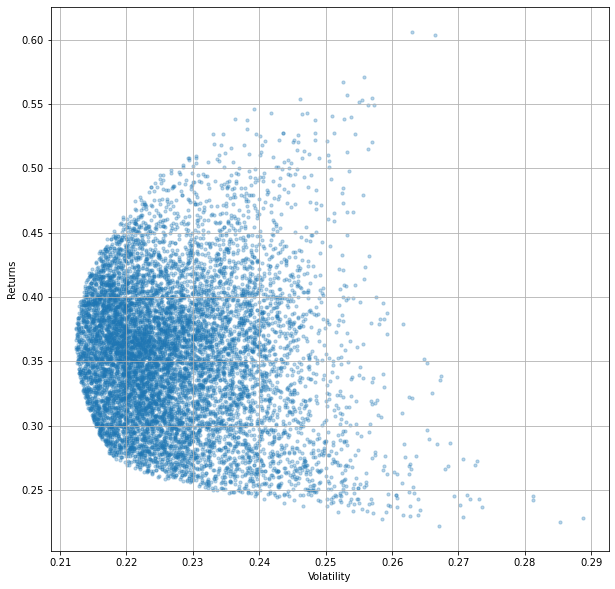

In [34]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [35]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]                       
min_vol_port

Returns         0.366604
Volatility      0.212390
AAPL weight     0.220426
NKE weight      0.452414
GOOGL weight    0.305166
AMZN weight     0.021993
Name: 885, dtype: float64

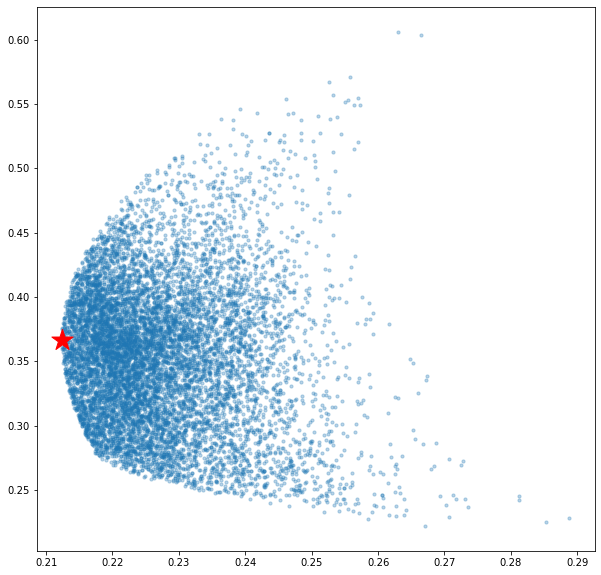

In [36]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [37]:
# Finding the optimal portfolio
Rf=4
annRiskFreeRate = Rf/100
rf = (np.power((1 + annRiskFreeRate),  (1.0 / 360.0)) - 1.0) * 100 
#rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.606158
Volatility      0.262997
AAPL weight     0.912369
NKE weight      0.056785
GOOGL weight    0.020693
AMZN weight     0.010154
Name: 4152, dtype: float64

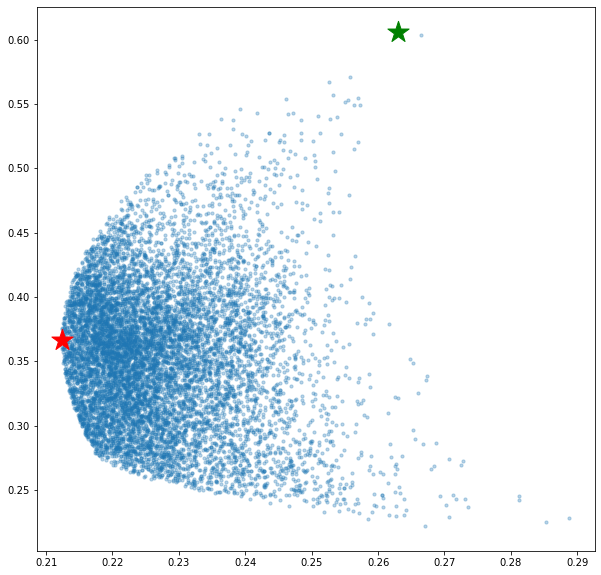

In [38]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)